<a href="https://colab.research.google.com/github/joyinning/python_music_recommendation_system/blob/main/music_recommendation_system_eunbi_kim_project_reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Project Summary**

![picture](https://drive.google.com/uc??export=view&id=1_W8q7ee-E4_yFXDGHsda4SS2tFLzmRtE)

### **Background**

Big companies (Spotify and Apple Music) have already adapted and developed the new technology trend by releasing their innovative ML-based approaches and services, including the AI solution to recommend songs to users. Through this algorithm, it is possible to increase user satisfaction and engagement in the music streaming services as well as make enormous profits against competitors.

### **Objectives & Questions**

We will understand what the music recommendation system is, explore all possible machine learning models for building the system, and solve the following business and technical questions.
1. Which model can be applied to create the music recommendation system?
2. How do the models recommend songs to users?

# **2. Exploratory Data Analysis (EDA)**
This part is exploring the given data set to understand the basic data structure, the meaning of values, and the importance of features for building a music recommendation system. <br>
<br>
The exploratory data analysis will be conducted based on the following process.
1. Import required libraries
2. Upload the data set
3. Understand the basic data structure
4. Check the samples
5. Investigate missing values
6. Handle outliers
7. Explore the values


### **1) Import required libraries**
Import required libraries for EDA.

In [ ]:
# For uploading the file
from google.colab import drive
drive.mount('/content/drive')

# For reading a data frame
import pandas as pd

# For visualization
import seaborn as sns

# Conduct mathematical operations
import numpy as np

Mounted at /content/drive


### **2) Upload the data set**
Upload the data set to the Python environment.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/IST 707 Project/0. Datasets_new/data.csv")

### **3) Understand the basic data structure**
The data set contains audio features of digital songs and information (artist, title, and release year) from Spotify. <br>
There are 170,652 rows (songs) with 19 columns (audio features and song information).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

### **4) Check the samples**
Check the samples to see what the data looks like.

- All audio features have numeric values.
- The `year` and `release_date` columns are the same data.
- The value in the `artist` column is in the brackets, because there may be multiple artists.

In [ ]:
data.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


### **5) Investigate Missing Values**
Look through the data set to see whether it has missing values or not because the missing values can reduce the quality of outputs from modeling.

There are no missing values in all columns in the data set.

In [ ]:
data.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

### **6) Handle outliers**
Generate statistical summary and find whether there are outliers in each column in the data set or not. <br>

- The outliers may interfere with making a good performance of building an algorithm.

In the below statistical summary, the numeric values in audio features are not on the same scale. We will solve this part for better outputs of the model, deploying normalization.

In [ ]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In the box plot of each audio feature after removing the `year` column, there are many outliers in the `duration_ms` column. Also, the outliers are detected in some other features.

<Axes: >

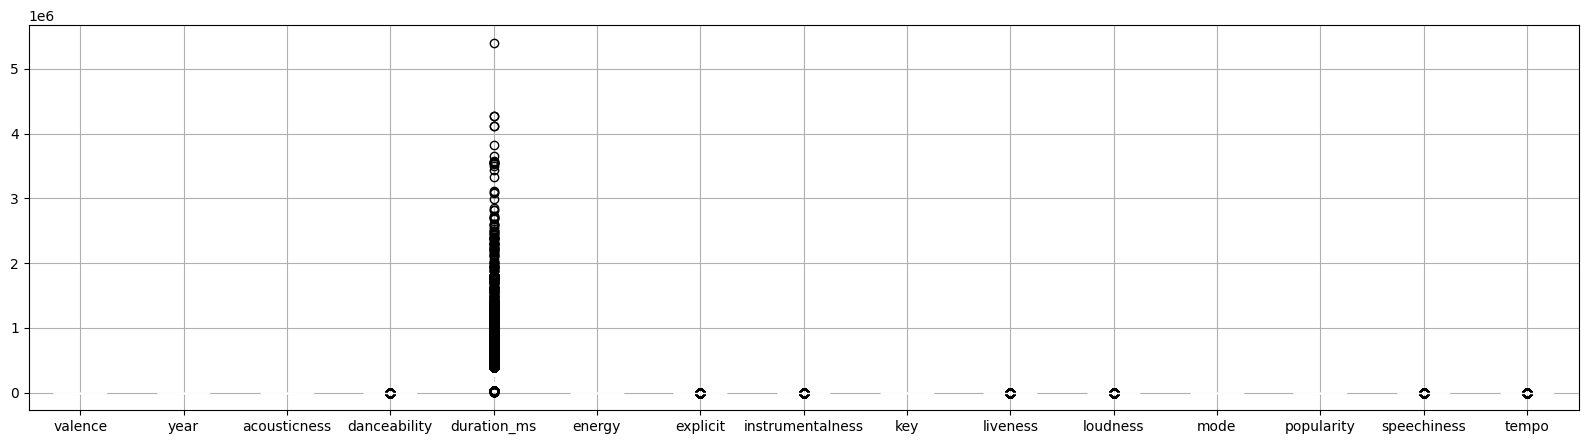

In [ ]:
data.boxplot(figsize = (20, 5), color = "white")

### **7) Explore the values**
Explore the values in the data set to understand what values the data set has.

**1] How many artists are in the data set?** <br>
There are 34,088 (unique) artists in the data set.


In [ ]:
len(data['artists'].unique())

34088

**2] When were the songs released?** <br>
First, check the basic statistical summary in the `year` column. <br>
Basically, the range of released year of songs in the data set is between **1921** to **2020**.

In [ ]:
data['year'].describe()

count    170653.000000
mean       1976.787241
std          25.917853
min        1921.000000
25%        1956.000000
50%        1977.000000
75%        1999.000000
max        2020.000000
Name: year, dtype: float64

Second, group the values in the `year` column for further analysis in convenience.

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    return str(period_start)

data['year_group'] = data['year'].apply(get_decade)
pd.DataFrame(data.groupby('year_group').size())

,0
year_group,
1920,5126
1930,9549
1940,15378
1950,19850
1960,19549
1970,20000
1980,19850
1990,19901
2000,19646


Then, visualize the result. <br>
Most songs in the data set were released between **1950s and 2010s**.

<Axes: xlabel='year_group', ylabel='Count'>

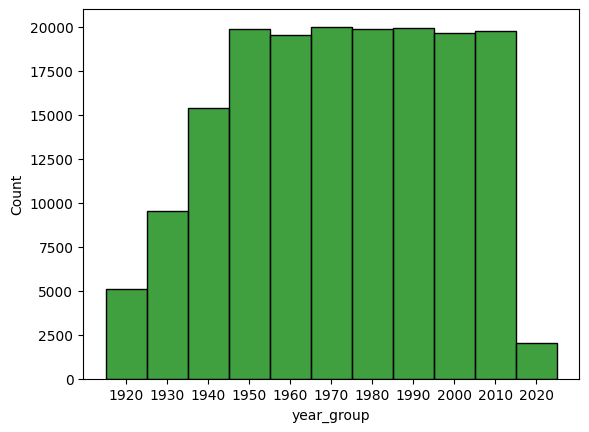

In [ ]:
sns.histplot(data = data, x = 'year_group', binwidth = 3, color = "green")

# **3. Modeling**
This part is building music recommendation models with the audio features, based on **Association Rules** and **Clustering** (with **Cosine Similarity**)
  <br>
<br>
The data modeling part will be implemented with the following steps. <br>
(Detailed explanations will bel provided in each model section.)
1. Data Preprocessing
2. Data Modeling
3. Model Evaluation

## **1) Association Rule**
Association Rule Mining can uncover interesting relationships between items.

**What is Association Rule?** <br>
It is one of the popular machine learning algorithms used to find frequent relationships and correlations between variables in large data sets. <br>
<br>
**Is Association Rule used in music recommendation systems?** <br>
It usually analyze the listening patterns of users and find associations between different songs or artists that are frequently listened to together. Using the audio features, it will find patterns or associations between different songs based on the preprocessed features.



**How is the music recommendation system built using Association Rule?** <br>
1. Data Preprocessing
> A) Preparation for Modeling <br>
> B) Discretization <br>
> C) One Hot Encoding
2. Data Modeling
> A) `apriori()` <br>
> B) `association_rules()` <br>
> C) Reviewing the rules <br>
3. Evaluation
> A) Find the best parameters <br>
> B) Repeat 2-A~C

### **1) Data Preprocessing**

### **1-A) Preparation for Modeling**
Install and upload required libraries.

In [ ]:
!pip install apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apriori: filename=apriori-1.0.0-py3-none-any.whl size=2478 sha256=1d983bf01d10e90ff72bc856196b33efffecaae8de90c313a1bb0a79faadfab3
  Stored in directory: /root/.cache/pip/wheels/e5/13/06/4f2e9149db374a829b7ee97bad99c9abffbf30976a81779b1c
Successfully built apriori


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

Divide the data set into two parts.
1. `data_info`: It consists of song information and is used for searching information of the recommended songs in the recommendation system.
2. `data_audio_features` = It contains the id and song features and is used for modeling the association rules.

In [ ]:
data_info = data[['year', 'artists', 'id', 'name', 'release_date']]
data_audio_features = data[['id','valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']]

In [ ]:
data_info.head(3)

,year,artists,id,name,release_date
0,1921,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",1921
1,1921,['Dennis Day'],7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,1921
2,1921,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1o6I8BglA6ylDMrIELygv1,Gati Bali,1921


In [ ]:
data_audio_features.head(3)

,id,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,4BJqT0PrAfrxzMOxytFOIz,0.0594,0.982,0.279,831667,0.211,0,0.878,10,0.665,-20.096,1,4,0.0366,80.954
1,7xPhfUan2yNtyFG0cUWkt8,0.9630,0.732,0.819,180533,0.341,0,0.000,7,0.160,-12.441,1,5,0.4150,60.936
2,1o6I8BglA6ylDMrIELygv1,0.0394,0.961,0.328,500062,0.166,0,0.913,3,0.101,-14.850,1,5,0.0339,110.339


### **1-B) Discretization**
Discretize the audio features, using bins (low, medium, and high) to reduce the number of unique values and make them manageable for AR model to handle.
- low: 0~33%
- medium: 33~66%
- high: 66~100%

In [ ]:
df = data_audio_features

In [ ]:
df['danceability_bin'] = pd.cut(df['danceability'], bins=[0, np.percentile(df['danceability'], 0.33), np.percentile(df['danceability'], 0.66), 1], labels=['low', 'medium', 'high'])
df['energy_bin'] = pd.cut(df['energy'], bins=[0, np.percentile(df['energy'], 0.33), np.percentile(df['energy'], 0.66), 1], labels=['low', 'medium', 'high'])
df['loudness_bin'] = pd.cut(df['loudness'], bins=[-60, np.percentile(df['loudness'], 0.33), np.percentile(df['loudness'], 0.66), 0], labels=['low', 'medium', 'high'])
df['speechiness_bin'] = pd.cut(df['speechiness'], bins=[0, np.percentile(df['speechiness'], 0.33), np.percentile(df['speechiness'], 0.66), 1], labels=['low', 'medium', 'high'])
df['acousticness_bin'] = pd.cut(df['acousticness'], bins=[0, np.percentile(df['acousticness'], 0.33), np.percentile(df['acousticness'], 0.66), 1], labels=['low', 'medium', 'high'])
df['instrumentalness_bin'] = pd.cut(df['instrumentalness'], bins=[0,0.33,0.66, 1], labels=['low', 'medium', 'high'])
df['liveness_bin'] = pd.cut(df['liveness'], bins=[0, np.percentile(df['liveness'], 0.33), np.percentile(df['liveness'], 0.66), 1], labels=['low', 'medium', 'high'])
df['valence_bin'] = pd.cut(df['valence'], bins=[0, np.percentile(df['valence'], 0.33), np.percentile(df['valence'], 0.66), 1], labels=['low', 'medium', 'high'])
df['tempo_bin'] = pd.cut(df['tempo'], bins=[0, np.percentile(df['tempo'], 0.33), np.percentile(df['tempo'], 0.66), 220], labels=['slow', 'medium', 'fast'])

<ipython-input-19-b969aec3a5ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['danceability_bin'] = pd.cut(df['danceability'], bins=[0, np.percentile(df['danceability'], 0.33), np.percentile(df['danceability'], 0.66), 1], labels=['low', 'medium', 'high'])
<ipython-input-19-b969aec3a5ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy_bin'] = pd.cut(df['energy'], bins=[0, np.percentile(df['energy'], 0.33), np.percentile(df['energy'], 0.66), 1], labels=['low', 'medium', 'high'])
<ipython-inp

### **1-C) One Hot Encoding**
Convert the discretized data into a binary format that is compatible with the AR Model

In [ ]:
one_hot = pd.get_dummies(df[['danceability_bin', 'energy_bin', 'loudness_bin', 'speechiness_bin', 'acousticness_bin', 'instrumentalness_bin', 'liveness_bin', 'valence_bin', 'tempo_bin']])

### **2) Data Modeling**
Run the apriori algorithm with the pre-processed audio features to find the best rules for recommendation systems.

### **2-A) `apriori()`**


First, create the frequent itemsets using `apriori()`.

In [ ]:
frequent_itemsets = apriori(one_hot, min_support = 0.05, use_colnames=True)

### **2-B) `association_rules()`**

Then, define the association rules based on the frequent itemsets. <br>
In this case, set "`support`" as the metric to find the most frequent itemset with which appears in a dataset.

In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.5)

### **2-C) Reviewing the rules**

As see the first few rules, most items that describes activeness are associated with other active audio features. (Energy, Danceability, Loudness and so on.)

In [ ]:
rules[['antecedents', 'support', 'confidence', 'lift', 'consequents']]

,antecedents,support,confidence,lift,consequents
0,(energy_bin_high),0.987489,0.994054,1.000810,(danceability_bin_high)
1,(danceability_bin_high),0.987489,0.994201,1.000810,(energy_bin_high)
2,(danceability_bin_high),0.987366,0.994077,1.000868,(loudness_bin_high)
3,(loudness_bin_high),0.987366,0.994112,1.000868,(danceability_bin_high)
4,(speechiness_bin_high),0.986997,0.994045,1.000801,(danceability_bin_high)
...,...,...,...,...,...
18655,(loudness_bin_high),0.511137,0.514629,1.006082,"(speechiness_bin_high, acousticness_bin_high, ..."
18656,(tempo_bin_fast),0.511137,0.514574,1.002301,"(speechiness_bin_high, acousticness_bin_high, ..."
18657,(valence_bin_high),0.511137,0.514574,1.005423,"(speechiness_bin_high, acousticness_bin_high, ..."
18658,(energy_bin_high),0.511137,0.514535,1.005576,"(speechiness_bin_high, acousticness_bin_high, ..."


### **3) Evaluation**
Based on the above baseline, find the best parameter to show the best associations (rules) in the audio feature data set.

In [ ]:
output = rules[['antecedents', 'confidence', 'support', 'lift', 'consequents']]

First, check the rules with the descending order of `lift`.

In [ ]:
output.nlargest(n = 5, columns = 'lift')

,antecedents,confidence,support,lift,consequents
12358,"(danceability_bin_high, loudness_bin_high, tem...",0.531588,0.518801,1.014654,"(speechiness_bin_high, instrumentalness_bin_low)"
12439,"(speechiness_bin_high, instrumentalness_bin_low)",0.990247,0.518801,1.014654,"(danceability_bin_high, loudness_bin_high, tem..."
16458,"(danceability_bin_high, loudness_bin_high, tem...",0.527944,0.515244,1.014643,"(speechiness_bin_high, acousticness_bin_high, ..."
16539,"(speechiness_bin_high, acousticness_bin_high, ...",0.990236,0.515244,1.014643,"(danceability_bin_high, loudness_bin_high, tem..."
16961,"(danceability_bin_high, loudness_bin_high, tem...",0.527337,0.514653,1.014597,"(speechiness_bin_high, liveness_bin_high, inst..."


Then, check the rules with a different order (`confidence` by descending).

In [ ]:
output.nlargest(n = 5, columns = 'confidence')

,antecedents,confidence,support,lift,consequents
13096,"(danceability_bin_high, liveness_bin_high, tem...",0.999266,0.518561,1.006093,(loudness_bin_high)
17138,"(acousticness_bin_high, danceability_bin_high,...",0.999261,0.515039,1.006088,(loudness_bin_high)
7240,"(danceability_bin_high, tempo_bin_fast, valenc...",0.999261,0.522722,1.006088,(loudness_bin_high)
16884,"(speechiness_bin_high, danceability_bin_high, ...",0.999260,0.514653,1.006087,(loudness_bin_high)
12844,"(acousticness_bin_high, danceability_bin_high,...",0.999256,0.519159,1.006083,(loudness_bin_high)


Next, check the rules with the other order (`support` by descending).

In [ ]:
output.nlargest(n = 5, columns = 'support')

,antecedents,confidence,support,lift,consequents
16,(energy_bin_high),0.996620,0.990038,1.003429,(loudness_bin_high)
17,(loudness_bin_high),0.996802,0.990038,1.003429,(energy_bin_high)
12,(valence_bin_high),0.995540,0.988890,1.002306,(danceability_bin_high)
13,(danceability_bin_high),0.995611,0.988890,1.002306,(valence_bin_high)
14,(tempo_bin_fast),0.994431,0.987788,1.001190,(danceability_bin_high)


Typically, the goal is to identify strong association between features that appear frequently. <br>
Therefore, sort the rules with the three measures (confidence, lift, and support) by descending order and print the best five rules.

The sequence of measures (confidence, lift, and support) is important in the above code.
1. Confidence and lift indicate which item sets have the strongest association.
2. Support describes which item sets appear frequently in the data set.
3. Overall, find the strongest rules (associations) using confidence and lift, and then select the rules which appear frequently in the set.

In [ ]:
output.nlargest(n = 5, columns = ['confidence', 'lift', 'support'])

,antecedents,confidence,support,lift,consequents
13096,"(danceability_bin_high, liveness_bin_high, tem...",0.999266,0.518561,1.006093,(loudness_bin_high)
17138,"(acousticness_bin_high, danceability_bin_high,...",0.999261,0.515039,1.006088,(loudness_bin_high)
7240,"(danceability_bin_high, tempo_bin_fast, valenc...",0.999261,0.522722,1.006088,(loudness_bin_high)
16884,"(speechiness_bin_high, danceability_bin_high, ...",0.999260,0.514653,1.006087,(loudness_bin_high)
12844,"(acousticness_bin_high, danceability_bin_high,...",0.999256,0.519159,1.006083,(loudness_bin_high)


Based on the findings from the above model, we will develop a new recommendation sysetem in Part 4.

## **2) Clustering**
Clustering makes groups with similar songs and creates the recommended playlist based on the user's preference (or request).

**What is clustering?** <br>
It involves grouping similar data points into clusters based on their distance or similarity. <br>
<br>
**Is clustering used in music recommendation systems?** <br>
It can be used in music recommendation systems by clustering songs based on the audio features and identifying groups of songs that share similar musical characteristics and recommend new songs to users based on their preferences. <br>
<br>
**How can be cosine similarity used in the clustering with the music recommendation system?** <Br>
It is used to calculate the pairwise cosine similarity between songs based on their audio features and use it as a distance measure for clustering.




**How is the music recommendation system built using clustering?** <br>
1. Data Preprocessing
> A) Normalization <br>
> B) Dimensionality Reduction
2. Data Modeling
> A) K-means Clustering <br>
> B) DBSCAN Clustering <br>
> C) Hierarchical (ward linkage) and Agglomerative Clustering <br>
> D) Spectral Clustering
3. Evaluation
> A) Avg. Silhouette Scores <br>
> B) Calinski-Harabasz Scores

### **1) Data Preprocessing**


### **1-A) Normalization**
Make all audio features (numeric values) on a common scale with equal importance, removing outliers from some audio features.


In [ ]:
data2 = data

In [ ]:
songs = data2.drop(['id', 'name', 'release_date', 'artists', 'mode', 'explicit', 'duration_ms', 'acousticness', 'year', 'popularity', 'danceability', 'loudness', 'tempo'], axis = 1)

Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
songs_normalized = songs.copy()
scaler = MinMaxScaler()

for i in songs.columns:
  songs_normalized[i] = scaler.fit_transform(songs_normalized[[i]])

Check the results using visualization

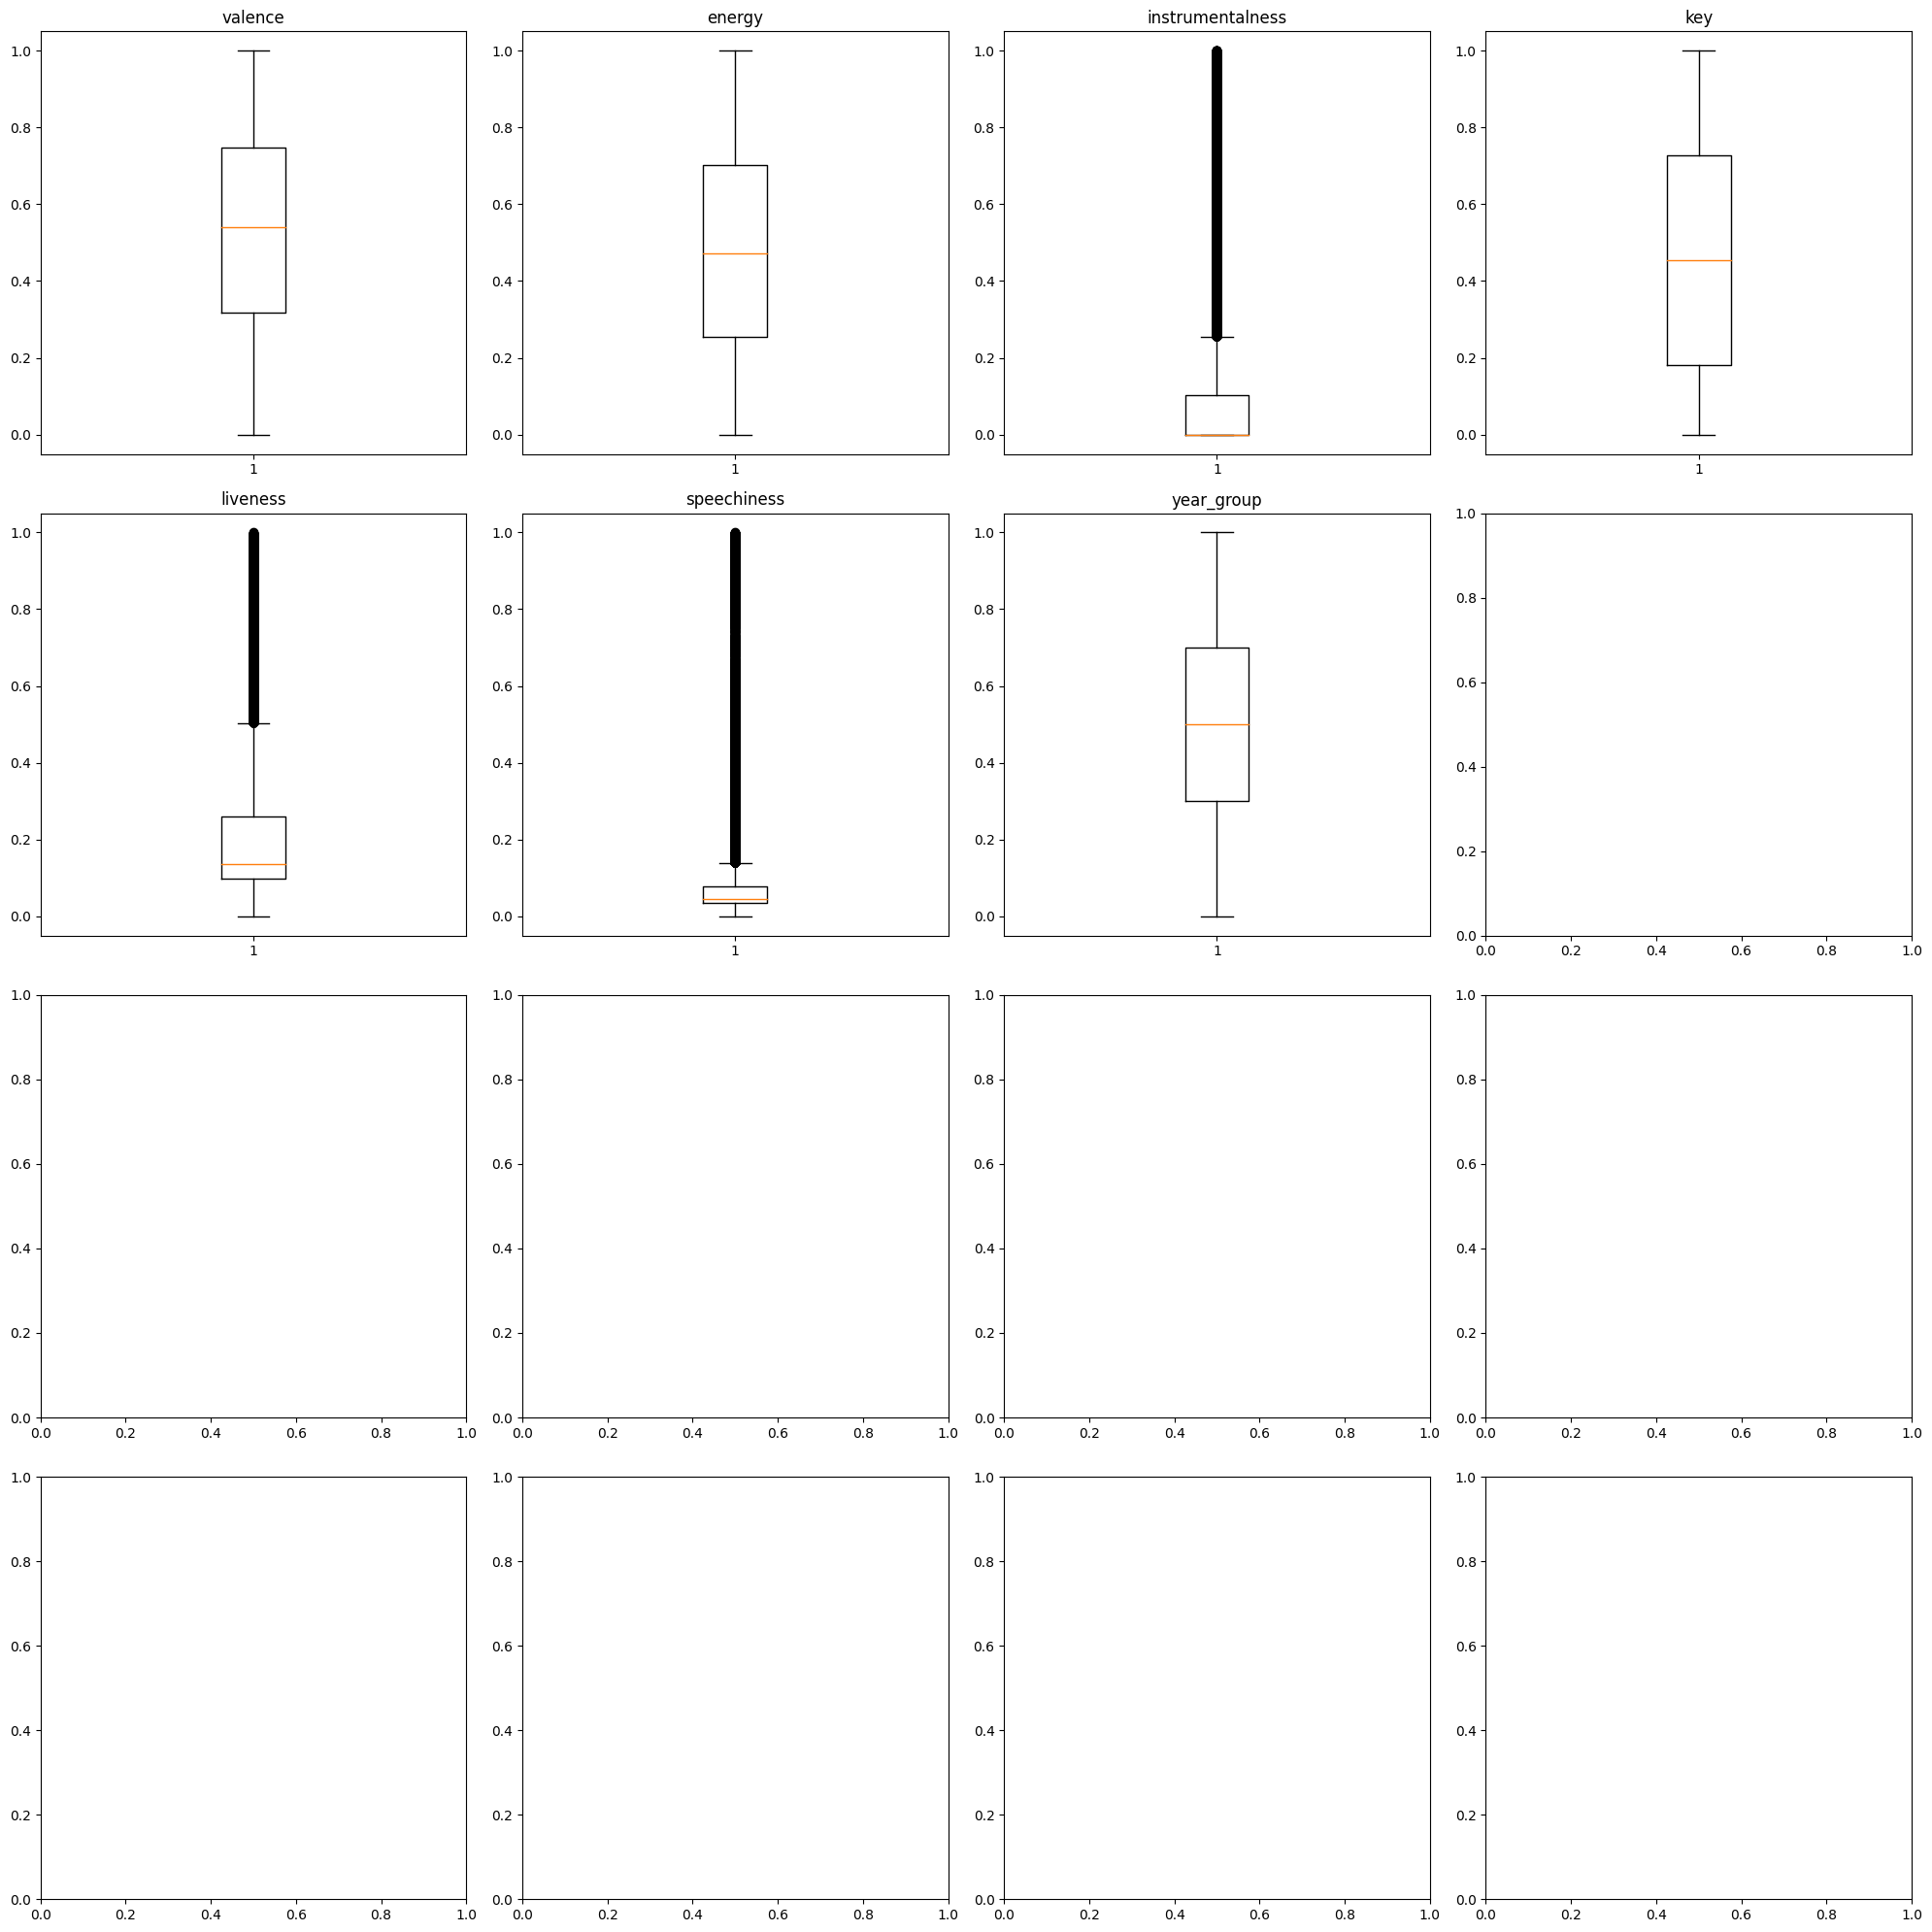

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure with subplots for each feature
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Loop through each feature and draw a boxplot on its respective subplot
for i, feature in enumerate(songs_normalized.columns):
    row = i // 4
    col = i % 4
    axs[row, col].boxplot(songs_normalized[feature])
    axs[row, col].set_title(feature)

plt.tight_layout()
plt.show()

In [ ]:
X = songs.sample(frac = 0.1, random_state=8).values

### **1-B) Dimensionality Reduction**
Reduce the computational complexity of clustering algorithms that contains normalized audio feature values and improve the accuracy, using **PCA** and **t-SNE** techniques.

- **PCA (Principal Component Analysis)**: A linear dimensionality reduction technique that identifies the most important variables and captures the maximum amount of variance in the data.
- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A non-linear dimensionality reduction technique that preserves the local structure of the data and identifies non-linear relationships between data points.


**PCA**


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset and extract features
# X = extract_features(data)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate the PCA object with desired number of components
n_components = 2
pca = PCA(n_components=n_components)

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# View the explained variance ratio for each principal component
print(pca.explained_variance_ratio_)

[0.26611292 0.18236745]


**The explained variance ration [0.26611292 0.18236745] indicates the following findings.**
- The first principal component explains 26.6% of the total variance in the data.
- The second principal component explains 18.2% of the total variance.
- Combining these two principal components, these two principal components explain 44.8% of the total variance in the data. (Jolliffe, 2011)

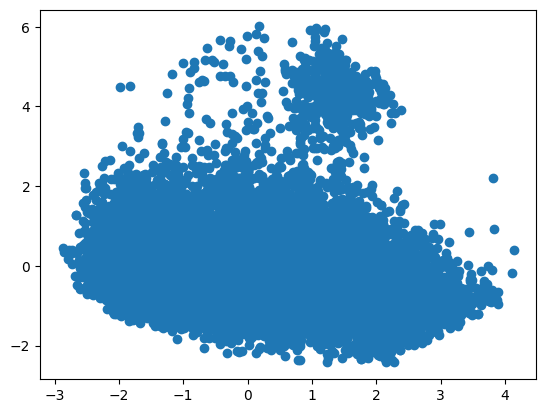

In [ ]:
plt.scatter([i[0] for i in X_pca], [i[1] for i in X_pca])

**t-SNE** <br>
There is no general way to evaluate the quality of t-SNE embeddings, we will evalaute the performance in the clustering model part. (Maaten and Hinton, 2008)

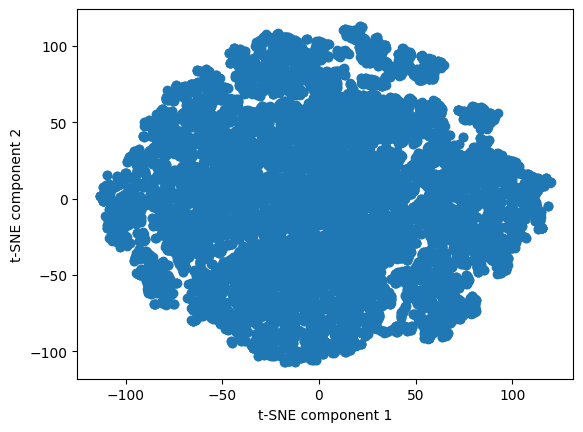

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate the t-SNE object with desired number of components and perplexity
n_components = 2
perplexity = 10
tsne = TSNE(n_components=n_components, perplexity=perplexity)

# Fit and transform the data
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE visualization
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

### **2) Data Modeling**

### **Finding the best k value (the number of Clustering)**
Before clustering, find the best k value (the number of clustering) using Elbow Method and Silhouette Score)

**Elbow Method**<br>
The best K value = 3

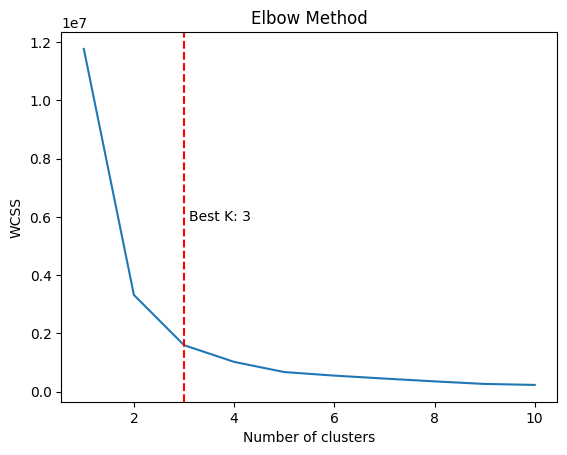

In [ ]:
from sklearn.cluster import KMeans

# calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# show the best k value
best_k = 3
plt.axvline(x=best_k, linestyle='--', color='red')
plt.text(best_k + 0.1, max(wcss)/2, f'Best K: {best_k}')

plt.show()

**Silhouette Score** <br>
The best K value = 10


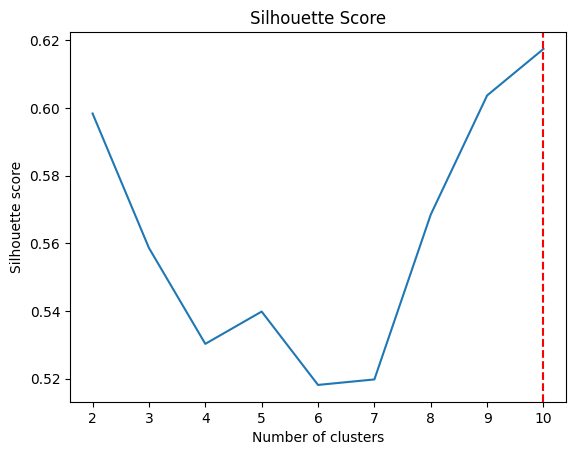

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# calculate Silhouette score for different number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# plot the Silhouette score
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

# show the best k value
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
plt.axvline(x=best_k, linestyle='--', color='red')

plt.show()

### **2-A) K-Means Clustering**
K-Means Clustering partitions a dataset into k clusters.

**Apply the K-Means clustering model to the dataset**

In [ ]:
# K means clustering

from sklearn.cluster import KMeans

# Initialize k-means object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit k-means model to data
kmeans.fit(X)

# Predict cluster labels for new data points
cluster_labels = kmeans.predict(X)

# Extract centroids of each cluster
centroids = kmeans.cluster_centers_
print(centroids)

[[4.76116190e-01 2.74120687e-01 2.95492301e-01 5.10364146e+00
  2.16766218e-01 1.16600308e-01 1.94576471e+03]
 [5.56564555e-01 5.86797190e-01 1.10019850e-01 5.26298455e+00
  1.99968533e-01 7.06834305e-02 1.98503420e+03]
 [4.85972706e-01 6.37735770e-01 8.65936580e-02 5.19649036e+00
  1.96776742e-01 9.26270638e-02 2.00585022e+03]
 [5.53154450e-01 2.69842837e-01 3.00067341e-01 5.35023041e+00
  2.19719026e-01 2.41645425e-01 1.92661619e+03]
 [5.68570249e-01 4.74642872e-01 1.36779310e-01 5.09113733e+00
  2.14308436e-01 6.09965604e-02 1.96497866e+03]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Plot the clusters**

1) t-SNE Perspective

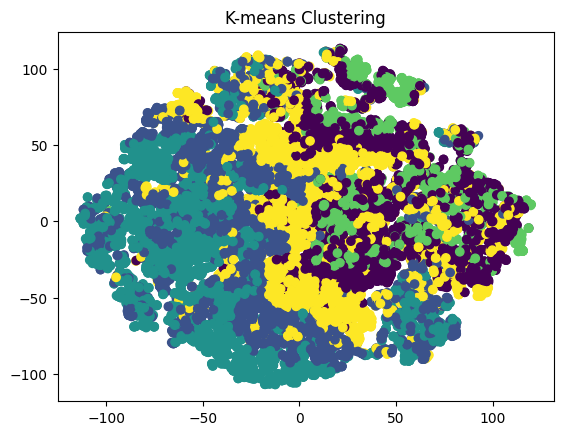

In [ ]:
# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels)
plt.title("K-means Clustering")
plt.show()

2) PCA Perspective

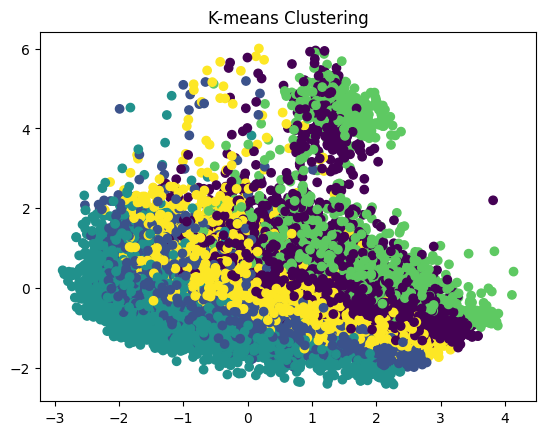

In [ ]:
# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.title("K-means Clustering")
plt.show()

### **2-B) DBSCAN Clustering**
It uses the closeness to each data points in a feature space and separating regions of low density.

**Apply the DBSCAN clustering model to the dataset**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict
y_pred_dbscan = dbscan.fit_predict(X)

t-SNE Perspective

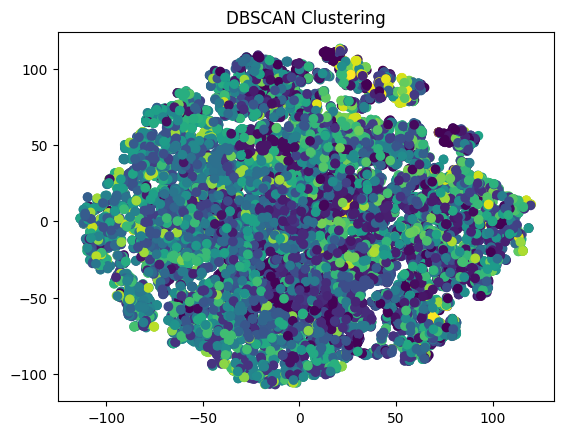

In [ ]:
# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred_dbscan)
plt.title("DBSCAN Clustering")
plt.show()

PCA Perspective

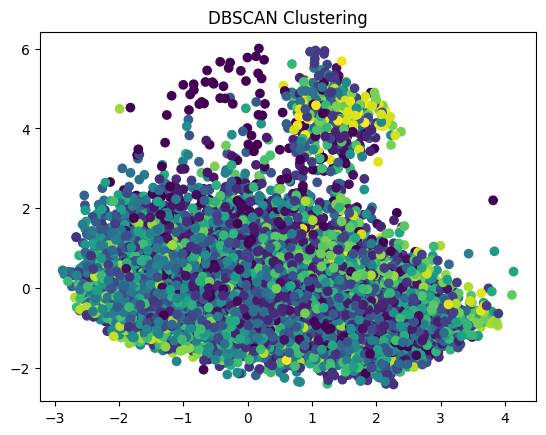

In [ ]:
# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_dbscan)
plt.title("DBSCAN Clustering")
plt.show()

### **2-C) Hierarchical with ward linkage**
It is a bottom-up approach that creates a tree-like structure of clusters.

**Apply the Hierarchical with ward linkage clustering model to the dataset**

t-SNE Persepctive

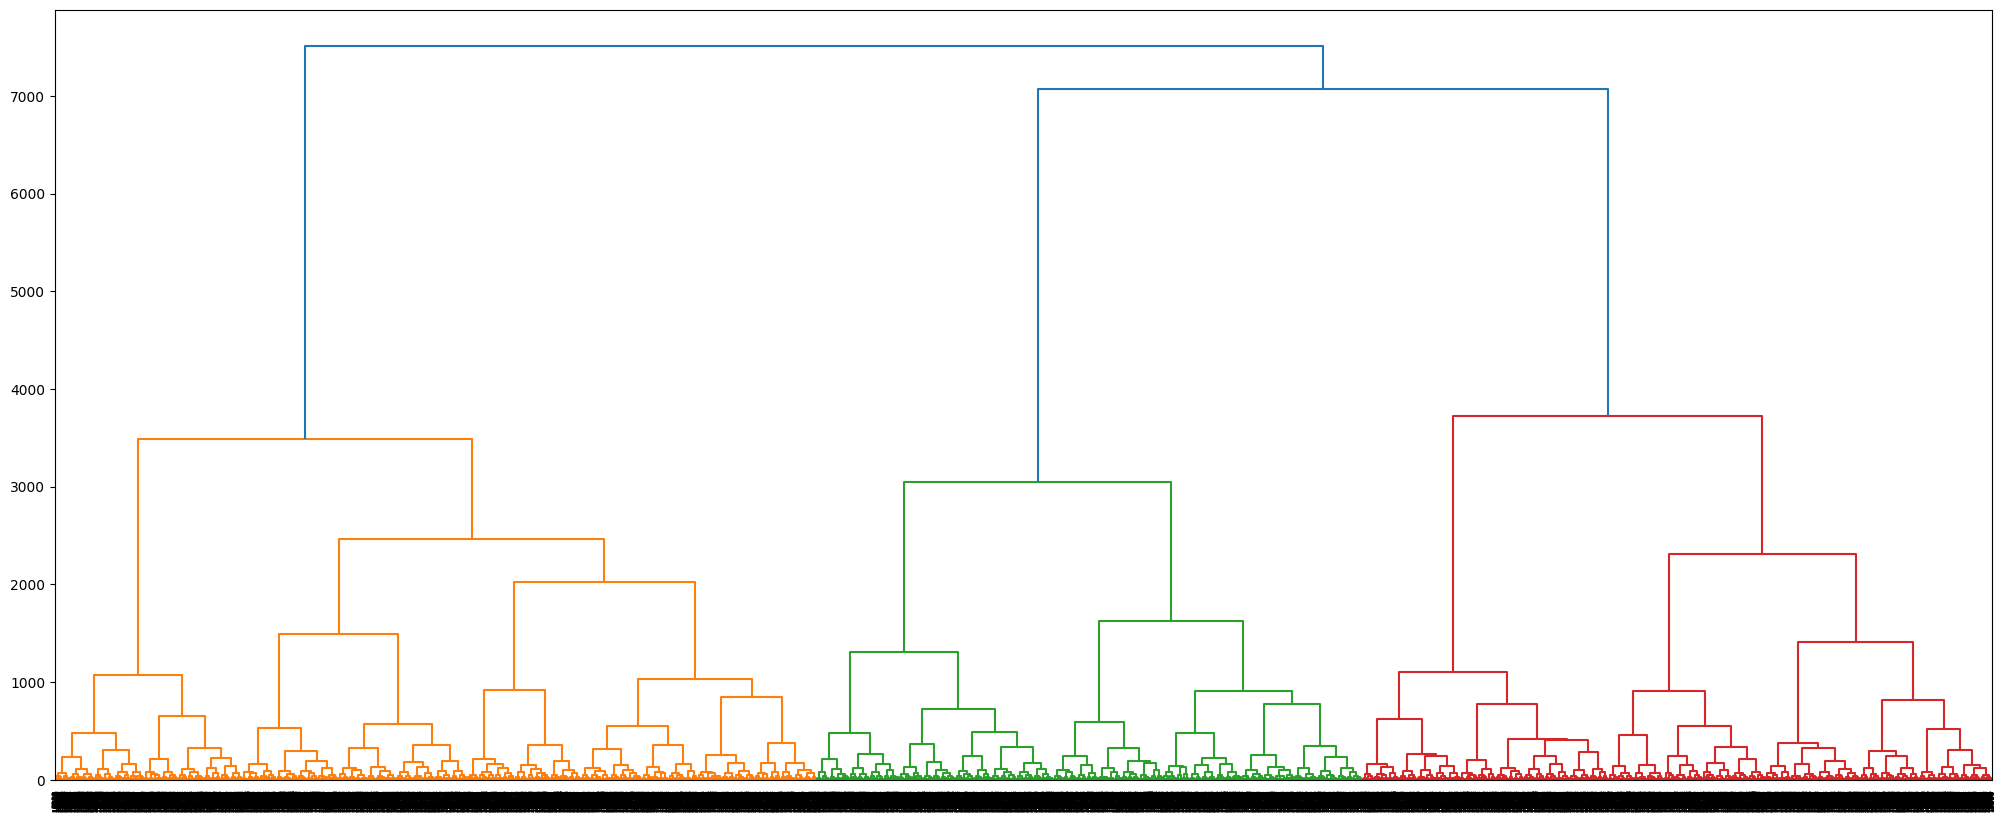

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
Z = linkage(X_tsne, 'ward')

# Plot the dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

PCA Perspective

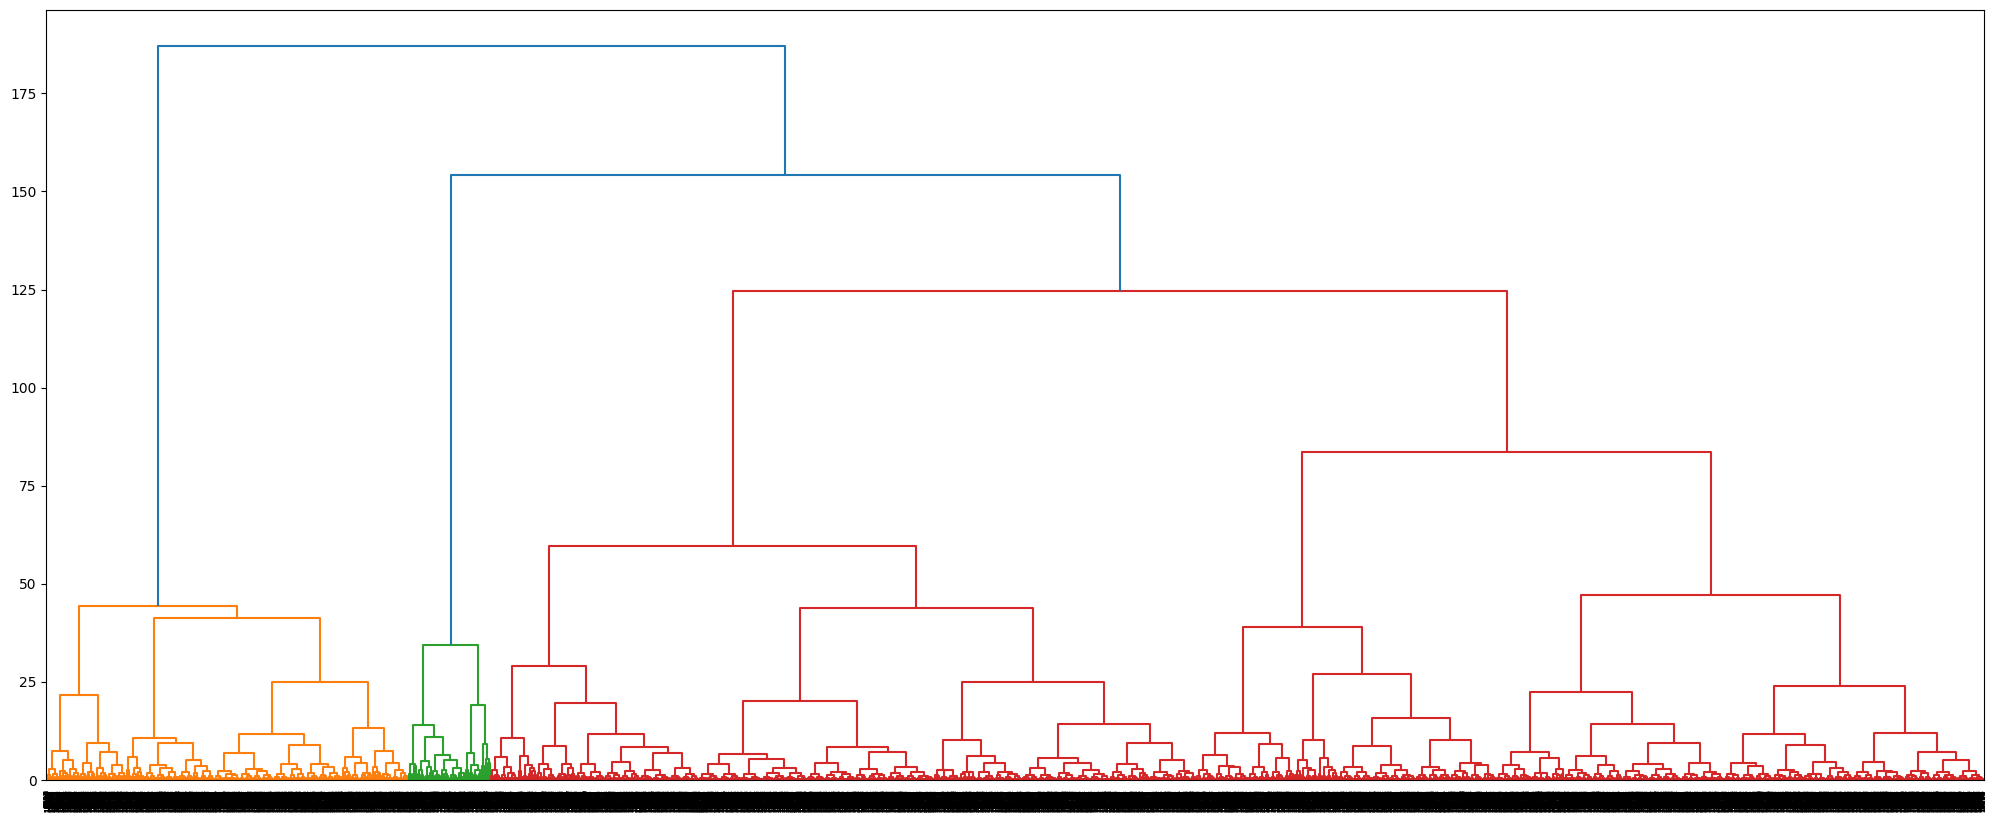

In [ ]:
# Compute the linkage matrix
Z1 = linkage(X_pca, 'ward')

# Plot the dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z1)
plt.show()

**Run the agglomerative clustering**


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Create an agglomerative clustering object
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Fit and predict
y_pred_ward = agg_clustering.fit_predict(X)

t-SNE Perspective

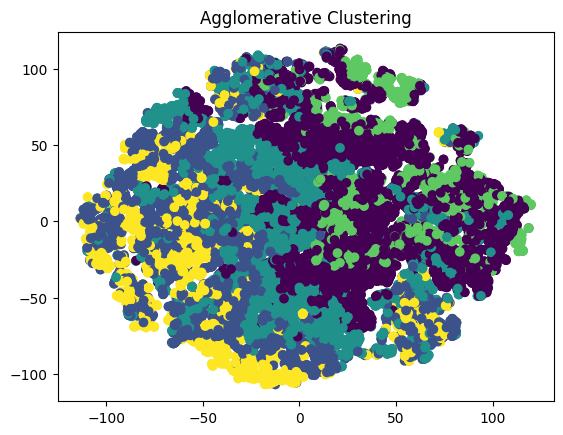

In [ ]:
# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred_ward)
plt.title("Agglomerative Clustering")
plt.show()

PCA Perspective

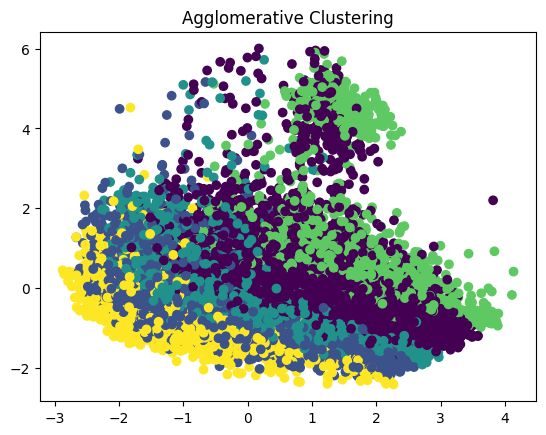

In [ ]:
# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_ward)
plt.title("Agglomerative Clustering")
plt.show()

### **2-D) Spectral Clustering**
It uses eigenvalues and eigenvectors of a similar matrix to clusters.

**Apply the Spectral clustering model to the dataset**

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create a spectral clustering object
sc = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', n_neighbors=10)

# Fit and predict
y_pred_spec = sc.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


t-SNE Perspective

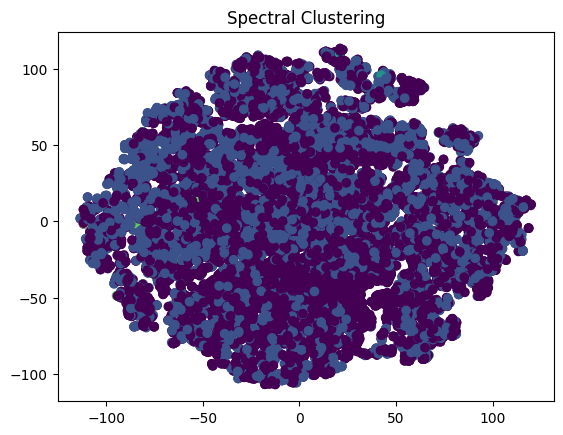

In [ ]:
# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred_spec)
plt.title("Spectral Clustering")
plt.show()

PCA Perspective

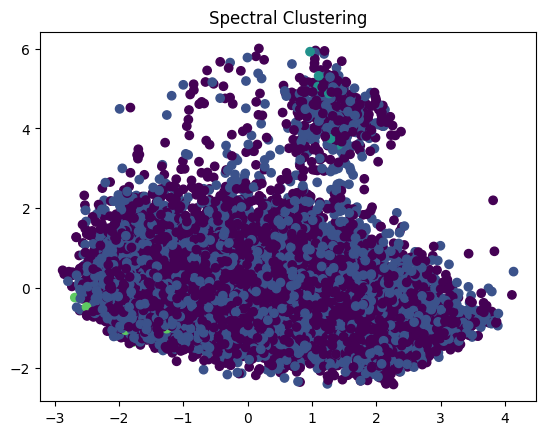

In [ ]:
# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_spec)
plt.title("Spectral Clustering")
plt.show()

### **3) Evaluation**
Evaluate the above cluster models, computing Avg. Silhouette and Calinski-Harabasz Scores.

**What is Avg. Silhouette score?**<br>
It measures how well each data point fits into its assigned cluster. <br>
<br>
**What is Calinski-Harabasz score?** <br>
It measures the ratio of between-cluster variance to the within cluster variance.
<br>
<br>
**What is the result?** <br>
Based on the results, **K-Means** will be the best model to build clustering model. <br>
- **Avg. Silhouette Score (0.503)**: The data point in k-means clusters is very well mached to its own cluster, but not to neighboring clusters.
- **Calinski-Harabasz Score (74711.500)**: It shows the better clustering results.


### **3-A) Avg. Silhouette Scores**


In [ ]:
from sklearn.metrics import silhouette_score

# K-means
silhouette_avg_k = silhouette_score(X, cluster_labels)
print("The average silhouette score of K-Means is :", silhouette_avg_k)

# DBSCAN
silhouette_avg_d = silhouette_score(X, y_pred_dbscan)
print("The average silhouette score of DBSCAN is :", silhouette_avg_d)

# Hierarchical with ward linkage
silhouette_avg_h = silhouette_score(X, y_pred_ward)
print("The average silhouette score of Hierarchical with ward linkage is :", silhouette_avg_h)

# Spectral
silhouette_avg_s = silhouette_score(X, y_pred_spec)
print("The average silhouette score of Spectral is :", silhouette_avg_s)

The average silhouette score of K-Mean is : 0.5398138715784329
The average silhouette score of DBSCAN is : 0.4596981951227886
The average silhouette score of Hierarchical with ward linkage is : 0.5031825821063515
The average silhouette score of Spectral is : -0.3580122839692388


### **3-B) Calinski-Harabasz Scores**

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# K-means
ch_score_k = calinski_harabasz_score(X, cluster_labels)
print("The average silhouette score of K-Means is :", ch_score_k)

# DBSCAN
ch_score_d = calinski_harabasz_score(X, y_pred_dbscan)
print("The average silhouette score of DBSCAN is :", ch_score_d)

# Hierarchical with ward linkage
ch_score_h = calinski_harabasz_score(X, y_pred_ward)
print("The average silhouette score of Hierarchical with ward linkage is :", ch_score_h)

# Spectral
ch_score_s = calinski_harabasz_score(X, y_pred_spec)
print("The average silhouette score of Spectral is :", ch_score_s)

The average silhouette score of K-Mean is : 69954.08739630812
The average silhouette score of DBSCAN is : 6559.146627225091
The average silhouette score of Hierarchical with ward linkage is : 57595.22890653629
The average silhouette score of Spectral is : 28.72213471938662


# **4. Preliminary Analysis**
This part is defining the preliminary conclusion from the above research, implementing application (developing recommendation systems), and make suggestions and improvements for further studies. <br>
<br>
The preliminary analysis part will be followed with the below steps.
1. Findings
2. Applications
3. Improvements (Suggestions for Further Studies)

## **1) Findings**

**Association Rule** <br>
- Metric = Support (Min = 0.05, Threshold = 0.5)
- Most active* digital songs contains instrumental-based features in the frequent item sets.
> Active: Danceability, energy, valence**, loudness <br>
> Valence: It shows the sentiment vibe of a song. The high valence means the song sounds more positive. (Santos, 2017)


**Clustering**
- Best Model: K-Means Clustering
- It shows the highest performance of matching data points in the own clusters and better clustering results.

## **2) Applications**

Input song title, artist name, or released year into the system and evaluate which model (AR or Clustering) is the best and whether it recommends s﻿ongs that a user feels satisfied with or not.

### **Association Rule**

In [ ]:
def recommend_ar(artist_name="", song_name=None, year=None):
    # Only artist name
    input_row = pd.Series()
    if artist_name != "" and song_name == "" and year is None:
        artist_one_hot = pd.get_dummies(data[data['artists'] == artist_name]['artists']).max()
        input_row = artist_one_hot
    # Only released year
    elif artist_name == "" and song_name == "" and year is not None:
        year_one_hot = pd.get_dummies(data[data['year'] == year]['year']).max()
        input_row = year_one_hot
    # Only Song name
    elif artist_name == "" and song_name != "" and year is None:
        song_one_hot = pd.get_dummies(data[data['name'] == song_name]['name']).max()
        input_row = song_one_hot
    # Year and artist name
    elif artist_name != "" and song_name != "" and year is not None:
        artist_one_hot = pd.get_dummies(data[data['artists'] == artist_name]['artists']).max()
        year_one_hot = pd.get_dummies(data[data['year'] == year]['year']).max()
        input_row = pd.concat([artist_one_hot, year_one_hot])

    # Apply association rules to generate recommendations
    frequent_itemsets = apriori(one_hot, min_support=0.05, use_colnames=True)
    recommendations = association_rules(frequent_itemsets, metric="support", min_threshold=0.5)
    recommendations = recommendations[recommendations['antecedents'].apply(lambda x: set(input_row) <= x)]

    # Sort recommendations by support, confidence, and lift, and return the top 10
    recommendations = recommendations.sort_values(by=['confidence', 'lift', 'support'], ascending=False).head(10)
    recommended_songs_index = recommendations.index
    recommended_songs = data.iloc[recommended_songs_index]

    return recommended_songs[['artists', 'name', 'year']]

In [ ]:
artist_name = input("Artist Name (Default): ")
song_name = input("Song Title (Optional): ")
year = input("Year (Optional): ")

recommendations = recommend_ar(artist_name, song_name, year)
pd.DataFrame(recommendations)

Artist Name (Default): Eminem
Song Title (Optional): 
Year (Optional): 


<ipython-input-59-b61232eddb83>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  input_row = pd.Series()


,artists,name,year
13096,['The Smiths'],Panic - 2011 Remaster,1987
17138,['The Archies'],"Sugar, Sugar",2007
7240,['Dean Martin'],Return To Me (Ritorna-Me) - 1997 Remaster,1958
16884,['Amos Lee'],Sweet Pea,2006
12844,['Beastie Boys'],Paul Revere,1986
18154,['Frank Ocean'],Bad Religion,2012
12340,['John Anderson'],Black Sheep,1983
16376,['Yiruma'],Kiss The Rain,2003
7115,['Harry Belafonte'],"Island In the Sun (From ""Island In the Sun"")",1957
2643,['The Carter Family'],Cannon Ball Blues,1935


### **Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
def recommend_c(data, artist_name="", song_name=None, year=None):
    # Clustering
    df = data
    # Normalization
    songs = df.drop(['id', 'name', 'release_date', 'artists', 'mode', 'explicit', 'duration_ms', 'acousticness', 'year', 'popularity', 'danceability', 'loudness', 'tempo'], axis = 1)
    #songs = songs[['year_group']].apply(pd.to_numeric)
    songs['year_group'], mapping = songs['year_group'].factorize()
    songs_normalized = songs.copy()
    scaler = MinMaxScaler()

    for i in songs.columns:
        songs_normalized[i] = scaler.fit_transform(songs_normalized[[i]])

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(songs_normalized)

    # PCA
    n_components = songs_normalized.shape[1]
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Initialize k-means object
    n_clusters = min(5, X_pca.shape[0])
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.predict(X_pca)
    centroids = kmeans.cluster_centers_

    # Get the features used in clustering
    features = ['valence', 'energy', 'instrumentalness', 'key', 'liveness', 'speechiness', 'decade']
    cluster_features = [f for f in features if f in data.columns]

    # input data
    input_row = pd.Series()
    if artist_name != "" and song_name == "":
        df = data[data['artists']=="[\'" + artist_name +"\']"]
        df['year_group'], mapping = df['year_group'].factorize()
        input_row = df.drop(['id', 'name', 'release_date', 'artists', 'mode', 'explicit', 'duration_ms', 'acousticness', 'year', 'popularity', 'danceability', 'loudness', 'tempo'], axis = 1).fillna(0).mean()
    # Only released year
    elif artist_name == "" and song_name == "" and year is not None:
        df = data[data['year']==year]
        df['year_group'], mapping = df['year_group'].factorize()
        input_row = df.drop(['id', 'name', 'release_date', 'artists', 'mode', 'explicit', 'duration_ms', 'acousticness', 'year', 'popularity', 'danceability', 'loudness', 'tempo'], axis = 1).fillna(0).mean()
    # Only Song name
    elif artist_name == "" and song_name != "" and year is None:
        df = data[data['name']==song_name]
        df['year_group'], mapping = df['year_group'].factorize()
        input_row = df.drop(['id', 'name', 'release_date', 'artists', 'mode', 'explicit', 'duration_ms', 'acousticness', 'year', 'popularity', 'danceability', 'loudness', 'tempo'], axis = 1).fillna(0).mean()
    # Year and artist name
    elif artist_name != "" and song_name != "" and year is not None:
        df = data[data['name']==song_name & data['year']==year & data['artists']==artist_name]
        df['year_group'], mapping = df['year_group'].factorize()
        input_row = df.drop(['id', 'name', 'release_date', 'artists', 'mode', 'explicit', 'duration_ms', 'acousticness', 'year', 'popularity', 'danceability', 'loudness', 'tempo'], axis = 1).fillna(0).mean()

    # Normalize input row
    input_row = scaler.transform([input_row])

    # Compute cosine similarity between the input row and each cluster centroid
    similarities = cosine_similarity(input_row, centroids)

    # Get the top 10 songs with the highest cosine similarity to the input row based on the popularity
    indices = np.argsort(similarities)[0][::-1][:10]
    recommended_songs_index = [i for i in range(len(cluster_labels)) if cluster_labels[i] in indices]
    recommended_songs = data.iloc[recommended_songs_index].sort_values(by="popularity", ascending = False).head(10)

    return recommended_songs[['artists', 'name', 'year']]


In [ ]:
artist_name = input("Artist Name (Default): ")
song_name = input("Song Title (Optional): ")
year = input("Year (Optional): ")

recommendations = recommend_c(data, artist_name, song_name, year)
recommendations

Artist Name (Default): Eminem
Song Title (Optional): 
Year (Optional): 


<ipython-input-132-484bf27bc232>:36: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  input_row = pd.Series()
<ipython-input-132-484bf27bc232>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_group'], mapping = df['year_group'].factorize()
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,artists,name,year
19611,"['Bad Bunny', 'Jhay Cortez']",Dakiti,2020
19606,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),2020
19618,['BTS'],Dynamite,2020
19608,"['Cardi B', 'Megan Thee Stallion']",WAP (feat. Megan Thee Stallion),2020
19610,['Ariana Grande'],positions,2020
19612,['Pop Smoke'],What You Know Bout Love,2020
19616,['The Weeknd'],Blinding Lights,2020
19607,"['Pop Smoke', 'Lil Baby', 'DaBaby']",For The Night (feat. Lil Baby & DaBaby),2020
19615,"['Justin Bieber', 'Chance the Rapper']",Holy (feat. Chance The Rapper),2020
19620,"['Justin Bieber', 'benny blanco']",Lonely (with benny blanco),2020


## **3) Improvements (Suggestions for Further Studies)**

To evaluate and improve the music recommendation system, we also need user data sets (personal information or listening history) to conduct the reinforcement learning for ranking the recommended songs and presenting the best.

# **5. References**

Jolliffe, I. T. (2011). Principal component analysis. Springer.

Maaten, L. V. D., & Hinton, G. (2008). Visualizing data using t-SNE. Journal of Machine Learning Research, 9(Nov), 2579-2605.

Scikit-learn. (n.d.). Clustering performance evaluation. Retrieved September 28, 2021, from https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

Santos, J. D. D. (2017, May 31). Is my Spotify music boring? an analysis involving music, data, and machine learning. Medium. Retrieved April 2, 2023, from https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de

Tan, P. N., Steinbach, M., & Kumar, V. (2006). Introduction to data mining. Addison-Wesley Longman Publishing Co., Inc.